In [2]:
from modules.file_processing import csv_to_pairs_txt
from modules.train_model import train_model
from modules.test_model import compare_faces

csv_to_pairs_txt('data/pairsDevTrain.txt', 'data/pairs_train.txt')
csv_to_pairs_txt('data/pairsDevTest.txt', 'data/pairs_test.txt')

✅ Создан файл data/pairs_train.txt с 2200 парами
✅ Создан файл data/pairs_test.txt с 1000 парами


In [2]:
from modules.train_model import train_model

model, best_auc = train_model(
    train_pairs="data/pairsDevTrain.txt",
    test_pairs="data/pairsDevTest.txt",
    root_dir="data/lfw_funneled",
    batch_size=16,
    lr=1e-4,
    epochs=50,
    patience=5,
    save_path="models/siamese_resnet_best.pth"
)


c:\Users\a.kozak\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\a.kozak\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/50 | Train Loss: 0.4653 | Acc: 0.6900 | PosDist: 0.5826 | NegDist: 0.9536 | AUC: 0.8279
Epoch 2/50 | Train Loss: 0.3527 | Acc: 0.7720 | PosDist: 0.5590 | NegDist: 1.0606 | AUC: 0.8699
Epoch 3/50 | Train Loss: 0.2989 | Acc: 0.7740 | PosDist: 0.5282 | NegDist: 1.0659 | AUC: 0.8785
Epoch 4/50 | Train Loss: 0.2579 | Acc: 0.7700 | PosDist: 0.4708 | NegDist: 1.0404 | AUC: 0.8866
Epoch 5/50 | Train Loss: 0.2245 | Acc: 0.7860 | PosDist: 0.5340 | NegDist: 1.1427 | AUC: 0.8791
Epoch 6/50 | Train Loss: 0.2010 | Acc: 0.7950 | PosDist: 0.5039 | NegDist: 1.1128 | AUC: 0.8870
Epoch 7/50 | Train Loss: 0.1794 | Acc: 0.7930 | PosDist: 0.5165 | NegDist: 1.1239 | AUC: 0.8801
Epoch 8/50 | Train Loss: 0.1622 | Acc: 0.8150 | PosDist: 0.5279 | NegDist: 1.1796 | AUC: 0.8954
Epoch 9/50 | Train Loss: 0.1382 | Acc: 0.8000 | PosDist: 0.5025 | NegDist: 1.1542 | AUC: 0.8871
Epoch 10/50 | Train Loss: 0.1267 | Acc: 0.7840 | PosDist: 0.5080 | NegDist: 1.1717 | AUC: 0.8780
Epoch 11/50 | Train Loss: 0.1244 | Acc:

✅ Один и тот же человек
Схожесть: 74.5% | L2 Distance: 0.5103


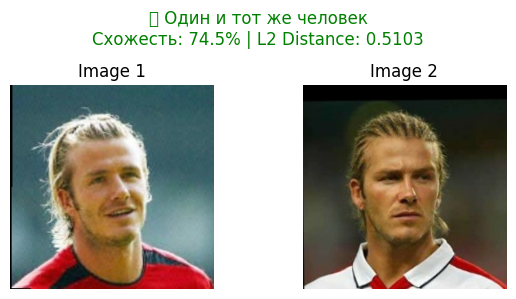

{'same_person': True,
 'similarity': 74.48592483997345,
 'distance': 0.510281503200531}

In [4]:
from modules.test_model import compare_faces

compare_faces(
    model_path="models/siamese_resnet_best.pth",
    img_path1=r"data\lfw_funneled\David_Beckham\David_Beckham_0013.jpg",
    img_path2=r"data\lfw_funneled\David_Beckham\David_Beckham_0014.jpg",
    threshold=2.0
)

✅ Один и тот же человек
Схожесть: 86.4% | L2 Distance: 0.2722


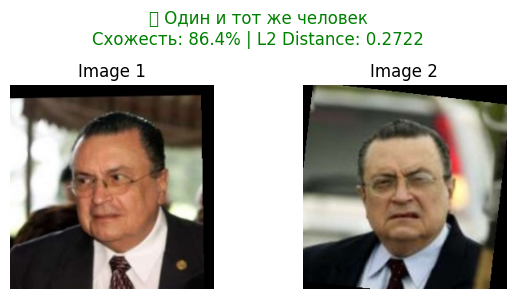

{'same_person': True,
 'similarity': 86.39155626296997,
 'distance': 0.2721688747406006}

In [5]:
compare_faces(
    model_path="models/siamese_resnet_best.pth",
    img_path1=r"data\lfw_funneled\Abel_Pacheco\Abel_Pacheco_0001.jpg",
    img_path2=r"data\lfw_funneled\Abel_Pacheco\Abel_Pacheco_0002.jpg",
    threshold=2.0
)

❌ Разные люди
Схожесть: 31.9% | L2 Distance: 1.3624


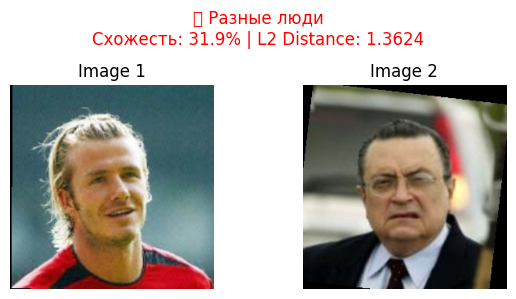

{'same_person': False,
 'similarity': 31.88137412071228,
 'distance': 1.3623725175857544}

In [6]:
compare_faces(
    model_path="models/siamese_resnet_best.pth",
    img_path1=r"data\lfw_funneled\David_Beckham\David_Beckham_0013.jpg",
    img_path2=r"data\lfw_funneled\Abel_Pacheco\Abel_Pacheco_0002.jpg",
    threshold=2.0
)

✅ Один и тот же человек
Схожесть: 64.8% | L2 Distance: 0.7042


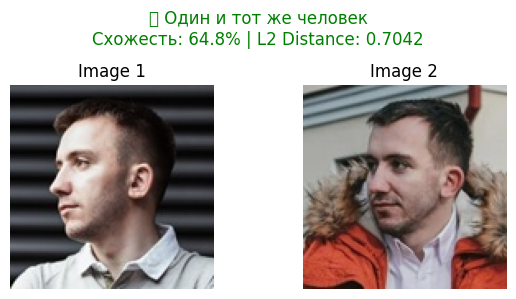

{'same_person': True,
 'similarity': 64.79199230670929,
 'distance': 0.7041601538658142}

In [11]:
compare_faces(
    model_path="models/siamese_resnet_best.pth",
    img_path1=r"data\photo\1.jpg",
    img_path2=r"data\photo\2.jpg",
    threshold=2.0
)